# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

#### Расшифровка названий столбцов

* id — уникальный идентификатор скважины;
* f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
* product — объём запасов в скважине (тыс. баррелей).

## Загрузка и подготовка данных

In [2]:
# Импорт библиотек
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from scipy import stats as st


In [3]:
# Загрузим данные
try:
    data0 = pd.read_csv('/datasets/geo_data_0.csv')
    data1 = pd.read_csv('/datasets/geo_data_1.csv')
    data2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    data0 = pd.read_csv('D:\Temp\Ya_Pr\geo_data_0.csv')
    data1 = pd.read_csv('D:\Temp\Ya_Pr\geo_data_1.csv')
    data2 = pd.read_csv('D:\Temp\Ya_Pr\geo_data_2.csv')

In [4]:
def first_look(data):
    display(data.info())
    display(data.describe())
    print('Дубликатов обнаружено: ', data.duplicated().sum())
    data.hist(figsize=(15, 10))
    plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


Дубликатов обнаружено:  0


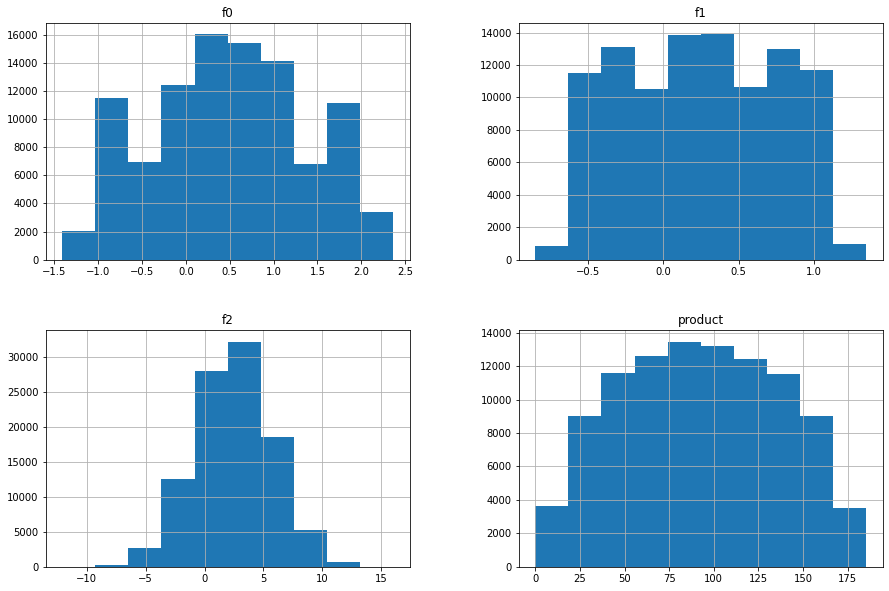

In [5]:
first_look(data0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


Дубликатов обнаружено:  0


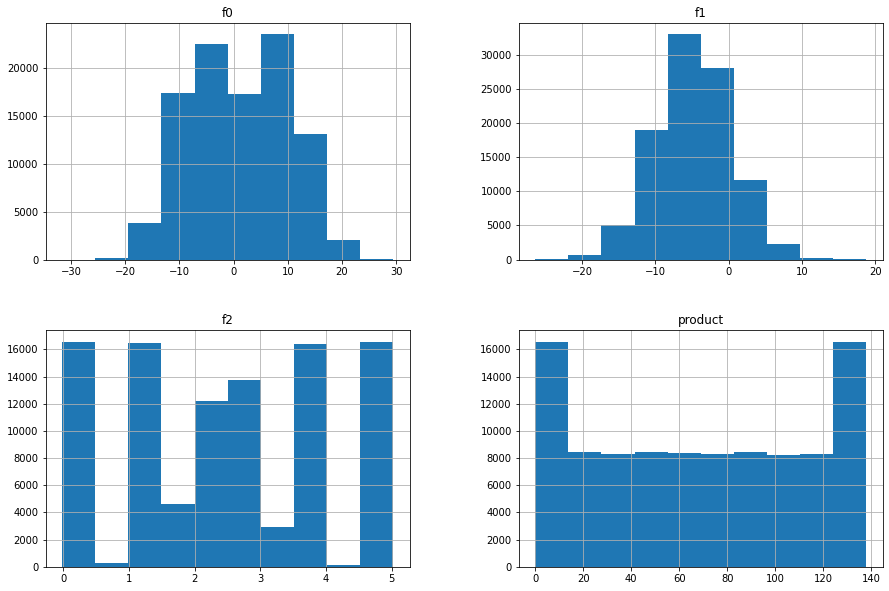

In [6]:
first_look(data1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Дубликатов обнаружено:  0


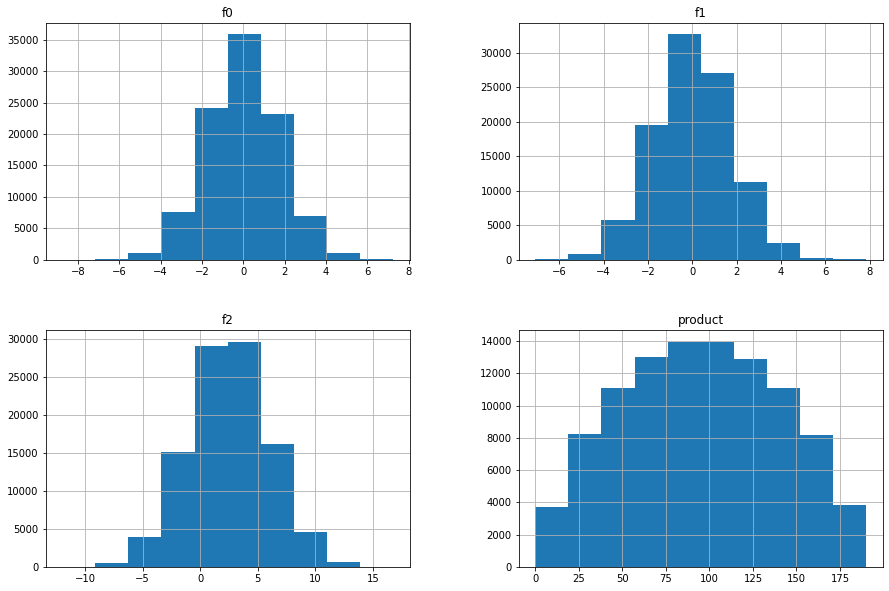

In [7]:
first_look(data2)

C:\Users\apple\AppData\Local\Temp\ipykernel_20724\3563733298.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_title('Регион ' + str(i))


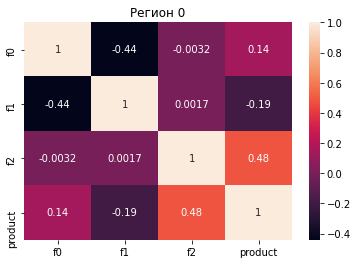

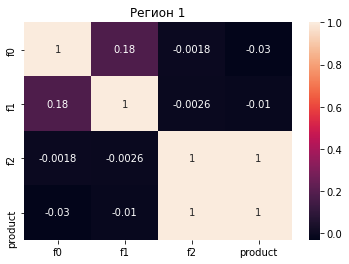

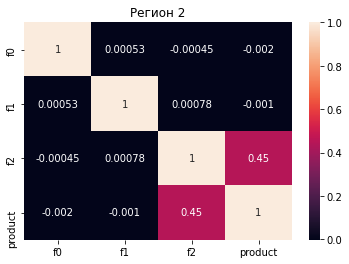

In [8]:
i = 0
for region in [data0, data1, data2]:
    sns.heatmap(region.corr(), annot = True)
    plt.axes().set_title('Регион ' + str(i))
    i += 1
    plt.show()

#### Краткий вывод
Данные загружены, просмотрены. Проблем, требующих внимания, не обнаружено.

Данные вполне пригодны для машинного обучения

## Обучение и проверка модели

In [9]:
# Функция для разбивки данных на обучающую и валидационные выборки

def train_and_valid(df):
    features = df.drop(['id', 'product'], axis=1)
    target = df['product']

    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=.25, random_state=11111)
    
    print('Размер обучающей выборки:', len(features_train))
    print('Соотношение размеров обучающих выборок:', len(features_train)/(len(features_train) + len(features_valid)), ':', len(features_valid)/(len(features_train) + len(features_valid)))
    print('Соотношение размеров валидационных выборок:', len(target_train)/(len(target_train) + len(target_valid)), ':', len(target_valid)/(len(target_train) + len(target_valid)))




    return features_train, features_valid, target_train, target_valid

In [10]:
features0_train, features0_valid, target0_train, target0_valid = train_and_valid(data0)

Размер обучающей выборки: 75000
Соотношение размеров обучающих выборок: 0.75 : 0.25
Соотношение размеров валидационных выборок: 0.75 : 0.25


In [11]:
features1_train, features1_valid, target1_train, target1_valid = train_and_valid(data1)

Размер обучающей выборки: 75000
Соотношение размеров обучающих выборок: 0.75 : 0.25
Соотношение размеров валидационных выборок: 0.75 : 0.25


In [12]:
features2_train, features2_valid, target2_train, target2_valid = train_and_valid(data2)

Размер обучающей выборки: 75000
Соотношение размеров обучающих выборок: 0.75 : 0.25
Соотношение размеров валидационных выборок: 0.75 : 0.25


In [13]:
# Обучим модели

def mean_and_RMSE(features_train, features_valid, target_train, target_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    predicted_valid_mean = predicted_valid.mean()
    rmse = mean_squared_error(target_valid, predicted_valid) ** .5
    rss = r2_score(target_valid, predicted_valid)
    return predicted_valid, predicted_valid_mean, rmse, rss

In [14]:
print('Регион 0:')
predicted0_valid, predicted0_valid_mean, rmse0, rss0 = mean_and_RMSE(features0_train, features0_valid, target0_train, target0_valid)

print('Средний запас сырья (предсказание)', predicted0_valid_mean)
print('RMSE = ', rmse0)
print('R^2 = ', rss0)



Регион 0:
Средний запас сырья (предсказание) 92.60219188065079
RMSE =  37.80134678944078
R^2 =  0.2778202170386185


In [15]:
print('Регион 1:')
predicted1_valid, predicted1_valid_mean, rmse1, rss1 = mean_and_RMSE(features1_train, features1_valid, target1_train, target1_valid)

print('Средний запас сырья (предсказание)', predicted1_valid_mean)
print('RMSE = ', rmse1)
print('R^2 = ', rss1)


Регион 1:
Средний запас сырья (предсказание) 69.42022806874756
RMSE =  0.8928812144337774
R^2 =  0.9996231335272422


In [16]:
print('Регион 2:')
predicted2_valid, predicted2_valid_mean, rmse2, rss2 = mean_and_RMSE(features2_train, features2_valid, target2_train, target2_valid)

print('Средний запас сырья (предсказание)', predicted2_valid_mean)
print('RMSE = ', rmse2)
print('R^2 = ', rss2)


Регион 2:
Средний запас сырья (предсказание) 94.93495745340292
RMSE =  40.234322699364704
R^2 =  0.19435498711533383


#### Краткий вывод
Данные разбиты на обучающие и валидационные выборки.

Для каждого региона рассчитаны средние запасы и среднеквадратичное отклонение.

В первом регионе обнаружена очень сильная корреляция между признаком f2 и целевым признаком (product). 

Также в модели по второму региону очень высок (~1) коэффициент детерминации R^2, что выглядит подозрительно.

## Подготовка к расчёту прибыли

In [18]:
# Константы
BUDGET = 10000000 # бюджет, тыс. руб.
INCOME = 450 # доход, тыс. руб. / 1 тыс. баррелей
MINES = 200 # количество скважин для разработки
MINES_SCOUT = 500 # количество скважин для разведки

min_limit = BUDGET / (INCOME * MINES) # минимальный объем для безубыточной разработки скважины

print('Минимальный объем для безубыточной разработки скважины:', round(min_limit, 2))

Минимальный объем для безубыточной разработки скважины: 111.11


In [19]:
# Сравним минимальный объем со средними значениями запасов

def limits(predicted_volume):
    if predicted_volume > min_limit:
        print(f'Предсказанный объем запасов ({round(predicted_volume, 2)}) больше минимального ({round(min_limit, 2)}) на {round(predicted_volume - min_limit, 2)}')
    else:
        print(f'Предсказанный объем запасов ({round(predicted_volume, 2)}) меньше минимального ({round(min_limit, 2)}) на {round(abs(predicted_volume - min_limit), 2)}')


print('Регион 0')
limits(predicted0_valid_mean)
print()
print('Регион 1')
limits(predicted1_valid_mean)
print()
print('Регион 2')
limits(predicted2_valid_mean)


Регион 0
Предсказанный объем запасов (92.6) меньше минимального (111.11) на 18.51

Регион 1
Предсказанный объем запасов (69.42) меньше минимального (111.11) на 41.69

Регион 2
Предсказанный объем запасов (94.93) меньше минимального (111.11) на 16.18


#### Краткий вывод
Определены переменные для расчета безубыточной разработки. Рассчитан минимальный объем сырья для безубыточной разработки скважины.

Для каждого региона рассчитана разница предсказанных запасов.

Во всех регионах средний запас меньше необходимого.

## Расчёт прибыли и рисков 

In [20]:
# Функция расчета прибыли отобранных скважин 
def income_summ(target, prediction, mines=MINES):
    prediction_selected = pd.Series(prediction).reset_index(drop=True).sort_values(ascending=False)[:mines]
    target_selected = target.reset_index(drop=True)[prediction_selected.index]
    income_selected = target_selected.sum() * INCOME - BUDGET
    return income_selected


In [33]:

print('Расчетный доход по региону 0:', round(income_summ(target0_valid, predicted0_valid), 2), 'млн руб.')
print('Расчетный доход по региону 1:', round(income_summ(target1_valid, predicted1_valid), 2), 'млн руб.')
print('Расчетный доход по региону 2:', round(income_summ(target2_valid, predicted2_valid), 2), 'млн руб.')

Расчетный доход по региону 0: 3338139.11 млн руб.
Расчетный доход по региону 1: 2415086.7 млн руб.
Расчетный доход по региону 2: 2487152.39 млн руб.


In [24]:
# Bootstrap
def bootstrap(target, predictions, iteration=1000, sample_size=MINES_SCOUT):
    r_state = np.random.RandomState(55555)
    values = []
    for i in range(iteration):
        target_sample = target.reset_index(drop=True).sample(sample_size, random_state=r_state, replace=True)
        proba_sample = predictions[target_sample.index]
        values.append(income_summ(target_sample, proba_sample))

    values = pd.Series(values)
    mean_values = values.mean()
    risk = (values < 0).mean()
    conf_interval = st.norm.interval(0.95, loc=mean_values, scale=values.sem())
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    return round(mean_values,2), conf_interval, round(risk*100, 2), (lower, upper)


In [27]:
region0_mean_values, region0_interval, region0_risk, quantiles0 = bootstrap(target0_valid, predicted0_valid)

print('Регион 0:')
print('Средняя доходность:', region0_mean_values, 'млн руб.')
print('Доверительный интервал:', region0_interval)
print('Доверительный интервал по квантилям:', quantiles0)
print('Риск убытков:', region0_risk, '%')



Регион 0:
Средняя доходность: 451567.04 млн руб.
Доверительный интервал: (435634.45558504376, 467499.633686695)
Доверительный интервал по квантилям: (-70697.32363411524, 940923.2747716204)
Риск убытков: 4.0 %


In [28]:
region1_mean_values, region1_interval, region1_risk, quantiles1 = bootstrap(target1_valid, predicted1_valid)

print('Регион 1:')
print('Средняя доходность:', region1_mean_values, 'млн руб.')
print('Доверительный интервал:', region1_interval)
print('Доверительный интервал по квантилям:', quantiles1)
print('Риск убытков:', region1_risk, '%')



Регион 1:
Средняя доходность: 504801.38 млн руб.
Доверительный интервал: (492336.9990101855, 517265.7569869261)
Доверительный интервал по квантилям: (122176.92738397249, 917190.3147702683)
Риск убытков: 0.5 %


In [30]:
region2_mean_values, region2_interval, region2_risk, quantiles2 = bootstrap(target2_valid, predicted2_valid)

print('Регион 2:')
print('Средняя доходность:', region2_mean_values, 'млн руб.')
print('Доверительный интервал:', region2_interval)
print('Доверительный интервал по квантилям:', quantiles2)
print('Риск убытков:', region2_risk, '%')



Регион 2:
Средняя доходность: 373543.17 млн руб.
Доверительный интервал: (356991.32978134893, 390095.0106096488)
Доверительный интервал по квантилям: (-160237.92563307387, 887049.5471551593)
Риск убытков: 8.6 %


#### Краткий вывод
С помощью техники Boоtstrap рассчитаны средняя доходность, доверительный интервал и риск убытков по каждому региону.

Наиболее перспективен регион 1.

# Общий вывод

*Задача.* По данным трёх регионов необходимо определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риск.

1. Данные загружены, проверены. 

2. Данные разбиты на обучающие и валидационные выборки. Для каждого региона рассчитаны средние запасы и среднеквадратичное отклонение.

3. Рассчитан минимальный объем сырья для безубыточной разработки скважины. Для каждого региона рассчитана разница предсказанных запасов. Во всех регионах средний запас меньше необходимого (111,11).

4. С помощью техники Boоtstrap рассчитаны средняя доходность, доверительный интервал и риск убытков по каждому региону. Наиболее перспективен регион 1 - риск убытков минимален (0,5 %), доход максимален (504801.38 млн руб.)

